# Ejercicio 16

16. Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma
probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30].
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea
como máximo 10

# Planteamineto
 Si ambas personas tienen la misma probabilidad de llegar al lugar se infieren dos variables aleatorias $x_1$ y $x_2$ que siguen una distribución uniforme en [0,30].
Sea $x_1$ la persona 1 que llega en cualquier momento dentro del tiempo [0,30]
ahora lluisantoniourbanaviles

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables 

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias 

En el planteamiento ya se especifica que $x_1 \sim U(0, 30)$ y que $x_1 \sim U(0,30)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación 

La diferencias $0 < x_1 - x_2< 10$ ; $0 < x_2 - x_1< 10$  modelan adecuadamente el sistema.

Si $$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [ ]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
def tolerancia(): 
    c=0                    
    x_1 = rnd.uniform(0,30)   #La funcion rnadom genera un númeroentre (0,1) pero multiplicando por 30 sigue una distribucion uniforme en (0,30)
    x_2 = rnd.uniform(0,30) 
    if 0<x_1 - x_2< 10 or 0<x_2 - x_1< 10:
      c+=1
    return c

In [ ]:
np.mean(prob_tolerancia(500))

0.5652657154086476

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [ ]:
def prob_tolerancia(n):                    
    proba = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                     # estimada al contar las veces que hay interferencia y dividir entre las veces que 
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += tolerancia()
        proba.append(inter/(i+1))
    return proba

In [ ]:
X = prob_tolerancia(500)                # Asignamos valores a n y realizamos el experimento

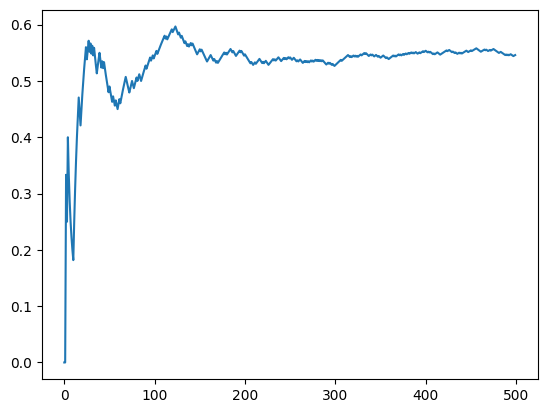

In [ ]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [ ]:
print(np.mean(X), np.std(X))

0.5314705502678405 0.058220854886780374


### 6. Repita el experimento $n$ veces 

Una forma de hacerlo es mediante el siguiente codigo.

In [ ]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_tolerancia(100)
        lista.append(np.mean(s))
    return lista

In [ ]:
Y=modelo(100)

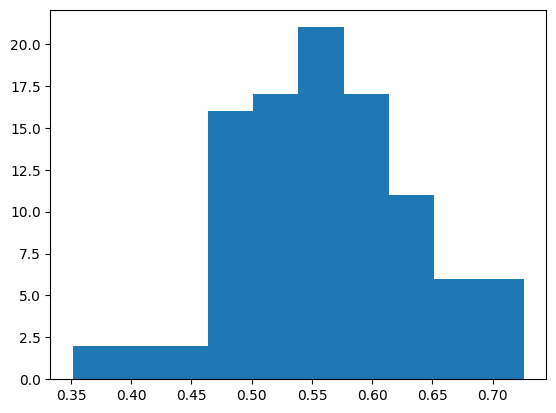

In [ ]:
plt.hist(Y)
plt.show()

In [ ]:
print(np.mean(Y), np.std(Y))

0.5580187586392027 0.07510691097702403


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [ ]:
np.mean(Y)

0.5580187586392027

In [ ]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.5372001850613981, 0.5788373322170073)

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [ ]:
N = (2*np.std(X)*1.96/0.01)**2

In [ ]:
print(N)

520.8699349080218
